In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']
labels-=1
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

In [4]:
# Model
clf = GaussianMixture(n_components=3, covariance_type='full')  

clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])
# fit
clf.fit(X_train, y_train)
# predict
pred_train = clf.predict(X_train)
pred = clf.predict(X_test)
#evaluate
print ('Train accuracy = ' + str(accuracy_score(y_train, pred_train)))
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Train accuracy = 0.908450704225
Test accuracy = 0.777777777778


In [5]:
#Thanks Ron Weiss for this code.

colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

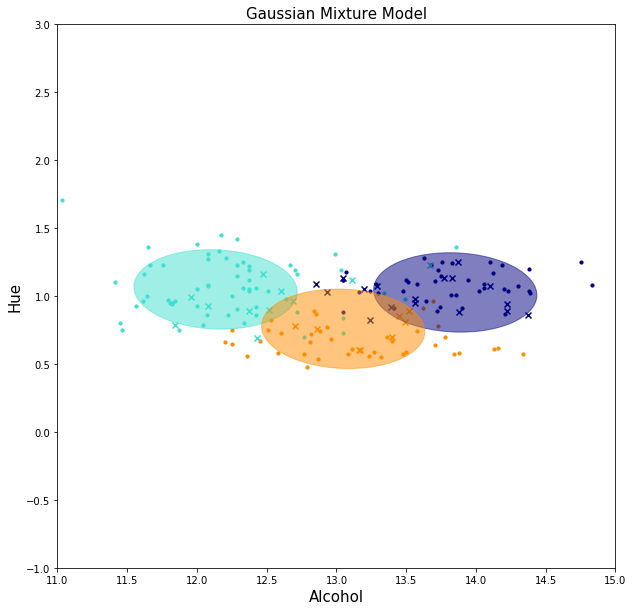

In [15]:
# Model
estimator = GaussianMixture(n_components=3,
                   covariance_type='tied', max_iter=20, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])

# Fit
estimator.fit(X_train, y_train)

# Plot
plt.figure(figsize=(10,10))
plt.ylim([-1,3])
plt.xlim([11,15])
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
h = plt.subplot()
make_ellipses(estimator, h)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[y_train == n]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)

plt.title('Gaussian Mixture Model', fontsize=15)

plt.show()

In [21]:
print (estimator.covariances_)

[[ 0.17118458 -0.00579269]
 [-0.00579269  0.0426741 ]]


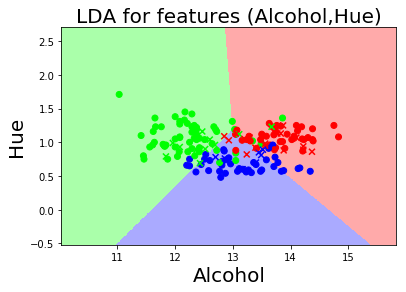

In [25]:
from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

clf = GaussianMixture(n_components=3,
                   covariance_type='tied', max_iter=20, random_state=0)

clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Hue'], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Hue', fontsize=20)
plt.title("LDA for features (Alcohol,Hue)", fontsize=20)


plt.show()

# Fisher Discriminant Analysis 

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

# Intialize
clf = LinearDiscriminantAnalysis()
# Train
clf.fit(X_train, y_train, )
# Test
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# print the accuracy
print ('Training accuracy = ' + str(np.sum(y_train_pred == y_train)/len(y_train)))
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Training accuracy = 1.0
Test accuracy = 0.944444444444


In [27]:
# Weight vector
clf.coef_

array([[  3.46423061e+00,  -5.53514236e-01,   4.06791897e+00,
         -8.37932651e-01,   7.22334160e-03,  -2.02884437e+00,
          5.56766611e+00,   1.08117032e+00,  -1.23185391e+00,
         -1.17422137e+00,  -1.61517893e+00,   3.56601382e+00,
          1.81106026e-02],
       [ -1.80191142e+00,  -6.30080891e-01,  -4.77893044e+00,
          2.98979233e-01,   8.95227517e-03,  -3.99909545e-01,
          1.65805074e+00,   4.15027563e+00,   5.96339693e-01,
         -7.27551511e-01,   3.51351648e+00,  -1.28752249e-01,
         -7.02187498e-03],
       [ -9.34575015e-01,   1.52631128e+00,   2.89708074e+00,
          4.31360434e-01,  -2.10129214e-02,   2.73015091e+00,
         -8.33312553e+00,  -7.36064228e+00,   3.98937069e-01,
          2.32425971e+00,  -3.57433683e+00,  -3.55118614e+00,
         -8.48332026e-03]])

In [28]:
clf = LinearDiscriminantAnalysis(n_components=2)
X_transform = clf.fit(X_train, y_train).transform(X_train)
X_test_transform = clf.transform(X_test)

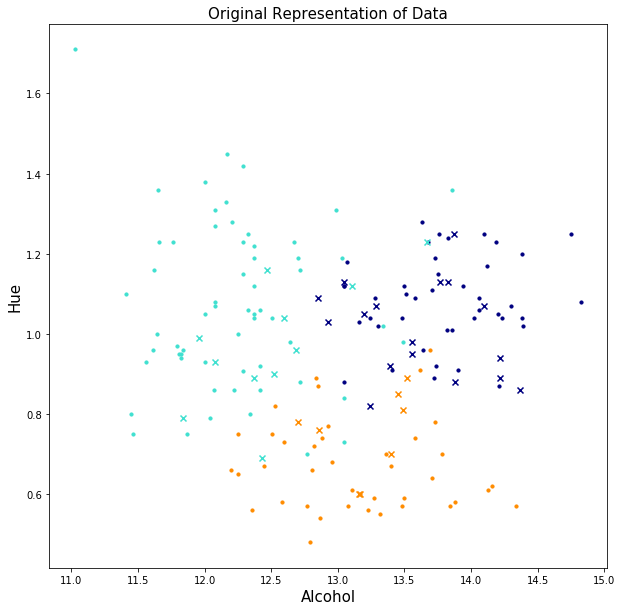

In [29]:
n_classes = len(np.unique(y_train))


# Plot
plt.figure(figsize=(10,10))
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[(y_train == n).values]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)


    
# plt.xticks(())
# plt.yticks(())
plt.title('Original Representation of Data', fontsize=15)

plt.show()

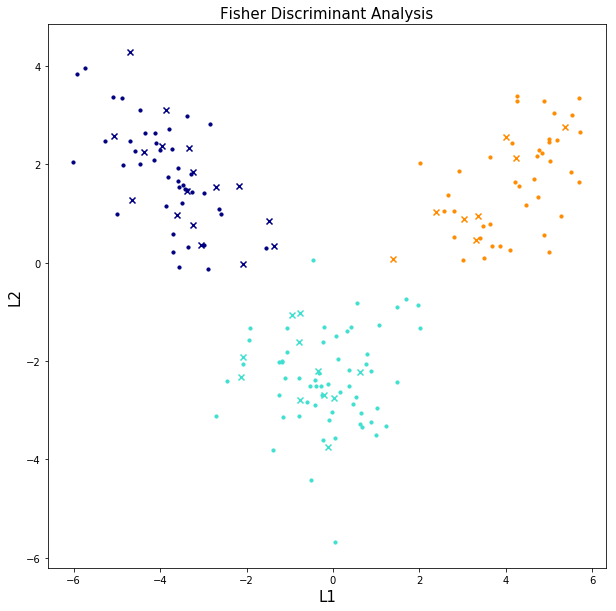

In [31]:
n_classes = len(np.unique(y_train))


# Plot
plt.figure(figsize=(10,10))
plt.xlabel('L1', fontsize=15)
plt.ylabel('L2', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_transform[(y_train == n).values]
    plt.scatter(train_data[:,0], train_data[:,1], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test_transform[(y_test == n).values]
    plt.scatter(test_data[:,0], test_data[:,1], marker='x', color=color)

    
# plt.xticks(())
# plt.yticks(())
plt.title('Fisher Discriminant Analysis', fontsize=15)

plt.show()

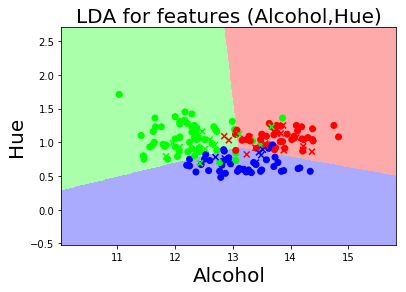

In [32]:
from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Hue'], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Hue', fontsize=20)
plt.title("LDA for features (Alcohol,Hue)", fontsize=20)


plt.show()

In [33]:
clf.coef_

array([[  3.1572291 ,   4.95655886],
       [ -2.629454  ,   4.17246078],
       [  0.62909045, -11.46307798]])

# Practice Question

## GMM

1.1. Build a GMM on the Iris data (first 2 features) and tune your model for different covariance types.

1.2. Plot the results as shown in the hands on.

## LDA

2.1. Perform Linear Discriminant Analysis on the Iris Data (first 2 features). 

2.2. Plot the results as shown in the hands on.